In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# github에 있는 파일 다운로드
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14672, done.
remote: Counting objects: 100% (226/226), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 14672 (delta 144), reused 200 (delta 127), pack-reused 14446
Receiving objects: 100% (14672/14672), 13.52 MiB | 23.99 MiB/s, done.
Resolving deltas: 100% (10117/10117), done.


In [2]:
# YOLO를 사용하는데 필요한 라이브러이 설치
# requirement.txt 안에 적혀있음
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 32.0 MB/s 


## 파일의 모든 경로가 담기 텍스트(txt) 파일 만들기

In [ ]:
# 많은 파일들을 다룰때 사용
from glob import glob

train_img_list = glob('/content/dataset/train/images/*.jpg')
test_img_list = glob('/content/dataset/test/images/*.jpg')
valid_img_list = glob('/content/dataset/valid/images/*.jpg')
len(valid_img_list)

39

In [ ]:
# train.txt, val.txt 파일에 각각 담아줌
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')
with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
# data.yaml 파일 불러와서 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f :
  data = yaml.safe_load(f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 2, 'names': ['cat', 'dog']}


In [ ]:
data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'
data

{'train': '/content/dataset/train.txt',
 'val': '/content/dataset/val.txt',
 'nc': 2,
 'names': ['cat', 'dog']}

In [ ]:
# data를 yaml파일에 덮어쓰기
with open('/content/dataset/data.yaml', 'w') as f :
  yaml.dump(data, f)

In [ ]:
# train.py : 알아서 학습을 하는 파이썬 파일
# !python train.py 
# --img 416 : 변환할 이미지 크기는 416*416으로 설정
# --batch 16 : 한번에 실행시킬 값(한번에 학습시킬 데이터량은 16으로 설정)
# --epochs 20 : 학습 횟수는 20으로 설정
# --data /content/dataset/data.yaml : 사용할 데이터 (data 경로는 data.yaml파일을 이용)
# --cfg ./models/yolov5s.yaml : 사용할 YOLOv5 모델  / (학습시간이 많이 걸림, 정확도 높음) yolov5x > yolov5l > yolov5m > yolov5n > yolov5s(학습 시간이 조금 걸림, 정확도 낮음-클래스가 적고 맞추기 쉬울 때)
# --weights yolov5s.pt : YOLO모델의 가중치
# --name cat_dog_yolov5s_results : 학습 완료 후, 학습 결과를 저장할 폴더 이름
!python train.py --img 416 --batch 16 --epochs 20 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name cat_dog_yolov5s_results

# 학습 결과 확인하기
<img src="https://drive.google.com/uc?id=16kHOtxJ0O0CIrnvhkTA9o1J9mZdVVLs4">

- box_loss : 영역 추정
- obj_loss : 객체 탐지
- 분류 : 정확도
- 회귀 : Methods
- 영역추정과 객체 탐지의 정확도 : mAP (판별 못함 0 ~ 1 판별 잘함)
  - mAP50보다는 mAP50-95가 더 정확함
  - 40.5%는 비교적 쉽게 나오는 수치(잘나온 것 아님)

  <img src="https://drive.google.com/uc?id=16A_7hCqoPsFlONS-n0lhhm6A1HBiEMgM">

In [ ]:
test_img = test_img_list[0]

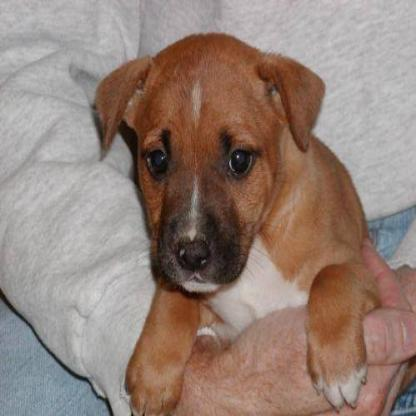

In [ ]:
from IPython.display import Image
Image(test_img)

In [ ]:
# !python detect.py 
# --weights /content/yolov5/runs/train/cat_dog_yolov5s_results/weights/best.pt
# --img 416 
# --conf 0.06 : conf(=confidence) : 판별율 0.06이상만 출력하는 것으로 설정(0.8로 설정해 주는 것이 좋음)
# --source "{test_img}"
rs = !python detect.py --weights /content/yolov5/runs/train/cat_dog_yolov5s_results/weights/best.pt --img 416 --conf 0.06 --source "{test_img}"

In [ ]:
rs

["\x1b\x1bdetect: \x1bweights=['/content/yolov5/runs/train/cat_dog_yolov5s_results/weights/best.pt'], source=/content/dataset/test/images/dog-33_jpg.rf.ed081b637509c93a19ade8c338d50578.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.06, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1",
 'YOLOv5 🚀 v6.2-208-g8236d88 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)',
 '',
 'Fusing layers... ',
 'YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs',
 'image 1/1 /content/dataset/test/images/dog-33_jpg.rf.ed081b637509c93a19ade8c338d50578.jpg: 416x416 1 dog, 8.2ms',
 'Speed: 0.4ms pre-process, 8.2ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)',
 'Resul

- /content/yolov5/detect.py
- detect.py파일 171번째 줄에<br>
  print(xyxy)<br>
  print(names[c])<br>
  print(conf)<br>
  추가<br><br>
- xyxy : 
          [tensor(72., device='cuda:0'), 
          tensor(43., device='cuda:0'), 
          tensor(348., device='cuda:0'), 
          tensor(257., device='cuda:0')]
- names[c] : dog
- conf : tensor(0.40589, device='cuda:0')